In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


In [4]:

df = pd.read_csv('/content/drive/MyDrive/Dataset/review_train.csv')
df.head(5)

,Text,Score,Sentiment
0,"I got a free sample of these once, and now--we...",5,1
1,I used to get this Tea when I lived in Washing...,4,1
2,This is my all time favorite 'grab and go' sna...,5,1
3,This flavor is very good and unexpected. The ...,4,1
4,thrilled to have this assortment as i got the ...,4,1


In [5]:
df

,Text,Score,Sentiment
0,"I got a free sample of these once, and now--we...",5,1
1,I used to get this Tea when I lived in Washing...,4,1
2,This is my all time favorite 'grab and go' sna...,5,1
3,This flavor is very good and unexpected. The ...,4,1
4,thrilled to have this assortment as i got the ...,4,1
...,...,...,...
14820,"This sweetener has a bitter after taste, the p...",2,0
14821,"I purchased these on a Gold Box Sale, probably...",5,1
14822,"THIS one is great, good BBQ flavor, moist, che...",5,1
14823,I drink red rose with bags and make ice tea wi...,5,1


In [6]:
df.columns

Index(['Text', 'Score', 'Sentiment'], dtype='object')

In [7]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(df["Sentiment"]), y= df["Sentiment"])


In [8]:
df["Sentiment"].value_counts()

1    12522
0     2303
Name: Sentiment, dtype: int64

In [9]:
class_weight_dict  = dict(enumerate(class_weights))
class_weight_dict

{0: 3.218627876682588, 1: 0.5919581536495767}

In [10]:
Sentiment_label = np.array(df[['Sentiment']])

In [11]:
review = df.Text.values
tokenizer = Tokenizer(num_words=10000)  # Tokenizer used for convert text to numeric number
tokenizer.fit_on_texts(review)    #Updates internal vocabulary based on a list of texts.
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)  #texts_to_sequences use for replace the words with their assigned numbers 
padded_sequence = pad_sequences(encoded_docs, maxlen=200)    # Use padding to pad the sentences to have equal length

In [23]:
# print(padded_sequence)
# print(tokenizer.word_index)

In [13]:
print(review[0])
print(encoded_docs[0])

I got a free sample of these once, and now--we're on the subscribe and save program.  Not much of a chip fan, I love the slight spiciness of these (from the pepper) and the exploded texture of the chip.  It's so nice they're not greasy, and they manage to hit those little salty + crunchy cravings that hit everyonce in a while!  Definitely recommended.
[2, 141, 4, 120, 1152, 7, 27, 328, 3, 90, 1170, 23, 1, 580, 3, 397, 1530, 20, 68, 7, 4, 589, 501, 2, 45, 1, 1098, 4300, 7, 27, 43, 1, 571, 3, 1, 9222, 302, 7, 1, 589, 48, 25, 144, 313, 20, 1266, 3, 22, 3029, 5, 843, 233, 78, 596, 484, 2025, 14, 843, 12, 4, 186, 217, 401]


In [14]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    2  141    4
  120 1152    7   27  328    3   90 1170   23    1  580    3  397 1530
   20   68    7    4  589  501    2   45    1 1098 4300    7   27   43
    1  571    3    1 9222  302    7    1  589   48   25  144  313   20
 1266    3   22 3029    5  843  233   78  596  484 2025   14  843   12
    4 

In [15]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'],)  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           815744    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 832,395
Trainable params: 832,395
Non-trainable params: 0
__________________________________________________

In [18]:
history = model.fit(padded_sequence,Sentiment_label,validation_split=0.2, epochs=5, batch_size=32, class_weight = class_weight_dict)

Epoch 1/5
371/371 [==============================] - 90s 228ms/step - loss: 0.5680 - accuracy: 0.7784 - val_loss: 0.4046 - val_accuracy: 0.8206
Epoch 2/5
371/371 [==============================] - 76s 204ms/step - loss: 0.3778 - accuracy: 0.8391 - val_loss: 0.2973 - val_accuracy: 0.8752
Epoch 3/5
371/371 [==============================] - 75s 201ms/step - loss: 0.2803 - accuracy: 0.8831 - val_loss: 0.3246 - val_accuracy: 0.8766
Epoch 4/5
371/371 [==============================] - 74s 199ms/step - loss: 0.2376 - accuracy: 0.9055 - val_loss: 0.4127 - val_accuracy: 0.8465
Epoch 5/5
371/371 [==============================] - 75s 202ms/step - loss: 0.1979 - accuracy: 0.9195 - val_loss: 0.4540 - val_accuracy: 0.7916


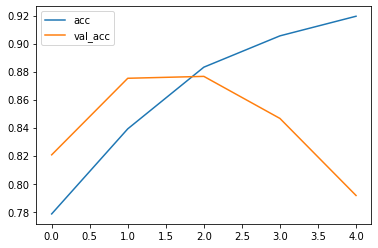

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

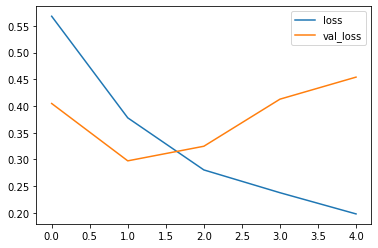

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [21]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", prediction)

In [22]:
test_sentence1 = "The food was not tasty"
predict_sentiment(test_sentence1)

test_sentence2 = "not good"
predict_sentiment(test_sentence2)

Predicted label:  0
Predicted label:  0
